In [1]:
# Dependencies
import matplotlib.pyplot as plt
import requests
import pandas as pd
from config import api_key
from pprint import pprint

In [2]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

In [3]:
# List of cities
cities = ["Paris", "London", "Oslo", "Beijing"]

# set up lists to hold response info
lat = []
temp = []

# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city).json()
    lat.append(response['coord']['lat'])
    temp.append(response['main']['temp'])

print(f"The latitude information received is: {lat}")
print(f"The temperature information received is: {temp}")

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 48.8534, 'lon': 2.3488},
 'dt': 1689964590,
 'id': 2988507,
 'main': {'feels_like': 21.56,
          'humidity': 44,
          'pressure': 1014,
          'temp': 22.14,
          'temp_max': 23.32,
          'temp_min': 21.32},
 'name': 'Paris',
 'sys': {'country': 'FR',
         'id': 2041230,
         'sunrise': 1689912557,
         'sunset': 1689968659,
         'type': 2},
 'timezone': 7200,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 300, 'speed': 5.14}}
{'base': 'stations',
 'clouds': {'all': 98},
 'cod': 200,
 'coord': {'lat': 51.5085, 'lon': -0.1257},
 'dt': 1689964272,
 'id': 2643743,
 'main': {'feels_like': 18.58,
          'humidity': 56,
          'pressure': 1013,
          'temp': 19.15,
          'temp_max': 20.06,
          'temp_min': 17.7},
 'name': 'London',
 'sys': {'co

In [4]:
# create a DataFrame from cities, lat, and temp
weather_dict = {
    "city": cities,
    "lat": lat,
    "temp": temp
}
weather_data = pd.DataFrame(weather_dict)
weather_data

,city,lat,temp
0,Paris,48.8534,22.14
1,London,51.5085,19.15
2,Oslo,59.9127,14.64
3,Beijing,39.9075,20.94


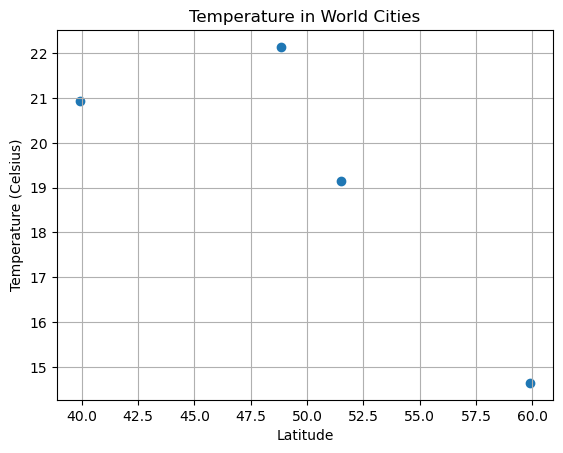

In [5]:
# Build a scatter plot for each data type
plt.scatter(weather_data["lat"], weather_data["temp"], marker="o")

# Incorporate the other graph properties
plt.title("Temperature in World Cities")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()